In [154]:
# Loading essential packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import os 

assert os.path.isdir('Data/') 
assert os.path.isfile('Data/lmpriser_eSundhed_200323.xlsx')
os.listdir('Data/')

['.ipynb_checkpoints',
 'lmpriser_eSundhed_200323.xlsx',
 'substitution groups.csv']

In [155]:
# a. Load Medicine data into a pandas dataframe 
file = 'Data/lmpriser_eSundhed_200323.xlsx' # Set Danish Pharma data to variable file 
medicine_primary = pd.read_excel(file) # Import excel sheet for analysis 

# b. Structure Primary Dataframe
column_english = {'Lægemiddel':'Medicine', 
                  'Varenummer':'Product_number', 
                  'Pakning':'Packing', 
                  'Styrke':'Strength', 
                  'Firma':'Company', 
                  'Indikator':'Indicator'}
medicine_primary.rename(columns = column_english, inplace=True) # Convert columns from Danish to English

column_values = list(medicine_primary.columns.values) # Create list of dataframes column names
column_values = column_values[8:]# narrow list to only focus on date variables

date_to_string = {} # Create dictionary for renaming date variables

# Loop throught all possible date variables and add an e in front in order to make it easier to manipulate 
for i in column_values:
    date_to_string[i] = f'e{i}'

medicine_primary.rename(columns = date_to_string, inplace=True) # Rename date variables in primary dataframe

In [103]:
medicine_primary.head()

,ATC,Medicine,Product_number,Packing,Strength,Form,Company,Indicator,e20150202,e20150216,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
0,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AIP,407.36,407.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP,570.25,570.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A01AA01,Bifluorid,42846,4 g + solvens,NaN,dentalsuspension,Voco,AUP_pr_DDD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A01AA01,Bifluorid,43158,10 g,NaN,dentalsuspension,Voco,AIP,602.07,602.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# c. Create sub-dataframe from the Primary dataframe focusing on the medicine Abilify 

medicine_dcopy = medicine_primary.copy() # Copying main dataframe prior to narrowing focus
abilify = medicine_dcopy.loc[medicine_dcopy['Medicine']=='Abilify'] # Focus on Abilify Medicine
I = abilify.Indicator.str.contains('AUP_pr_DDD') # filter to focus on price per daily dose
abilify = abilify.loc[I, :] # Generate new dataframe with price per daily dose 
drop_list = ['ATC', 'Form', 'Medicine'] # Filter out columns not to focus on
abilify.drop(drop_list, axis=1, inplace=True)
abilify.reset_index() # Reset index after filtering



,index,Product_number,Packing,Strength,Company,Indicator,e20150202,e20150216,e20150302,e20150316,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
0,46555,10951,28 stk. (blister),10 mg,Otsuka Pharma,AUP_pr_DDD,71.583543,71.583543,44.428671,40.038571,...,70.501420,70.501420,70.501420,70.501420,70.305887,70.305887,70.305887,70.305887,70.305887,70.305887
1,46559,10953,28 stk. (blister),15 mg,Otsuka Pharma,AUP_pr_DDD,47.723214,27.276786,22.398214,19.805357,...,47.001786,47.001786,47.001786,47.001786,46.871429,46.871429,46.871429,46.871429,46.871429,46.871429
2,46563,10964,28 stk. (blister),30 mg,Otsuka Pharma,AUP_pr_DDD,40.598214,37.791964,35.547321,32.864286,...,40.068750,40.068750,40.068750,40.068750,39.958036,39.958036,39.958036,39.958036,39.958036,39.958036
3,46567,11008,56 stk. (blister),10 mg,Otsuka Pharma,AUP_pr_DDD,71.254654,55.224600,39.781159,36.414164,...,70.355985,70.355985,70.355985,70.355985,70.161787,70.161787,70.161787,70.161787,70.161787,70.161787
4,46571,11019,56 stk. (blister),15 mg,Otsuka Pharma,AUP_pr_DDD,47.502679,47.502679,47.502679,47.502679,...,46.903571,46.903571,46.903571,46.903571,46.774107,46.774107,46.774107,46.774107,46.774107,46.774107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,46819,559540,56 stk. (blister) (New Neopharm),10 mg,New Neopharm,AUP_pr_DDD,58.775078,54.675488,45.562907,45.562907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,46823,580723,28 stk. (blister) (Abacus),30 mg,Abacus,AUP_pr_DDD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,46827,581517,28 stk. (blister) (Chemvet),15 mg,Chemvet,AUP_pr_DDD,46.746429,46.746429,46.746429,46.746429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,46831,597805,28 stk. (blister) (2care4),15 mg,EuroPharmaDK,AUP_pr_DDD,33.750000,33.750000,33.750000,33.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
abilify_long = pd.wide_to_long(abilify, stubnames='e', i="Product_number", j='Date') # Created long format of Abilify Dataframe
e_grouped = abilify_long.groupby('Product_number')['e'] # Grouped by product number

In [159]:
abilify_long = abilify_long.sort_values(['Product_number','Date']) # Organized product number by date
e_mean = abilify_long.groupby('Product_number')['e'].mean() # Calculated mean value of each product number 
e_mean.name ='e_mean'


Packing Strength   Indicator  \
Product_number Date                                               
10951          20150202  28 stk. (blister)    10 mg  AUP_pr_DDD   
               20150216  28 stk. (blister)    10 mg  AUP_pr_DDD   
               20150302  28 stk. (blister)    10 mg  AUP_pr_DDD   
               20150316  28 stk. (blister)    10 mg  AUP_pr_DDD   
               20150330  28 stk. (blister)    10 mg  AUP_pr_DDD   
...                                    ...      ...         ...   
599644         20200127    150 ml (2care4)  1 mg/ml  AUP_pr_DDD   
               20200210    150 ml (2care4)  1 mg/ml  AUP_pr_DDD   
               20200224    150 ml (2care4)  1 mg/ml  AUP_pr_DDD   
               20200309    150 ml (2care4)  1 mg/ml  AUP_pr_DDD   
               20200323    150 ml (2care4)  1 mg/ml  AUP_pr_DDD   

                               Company          e  
Product_number Date                                
10951          20150202  Otsuka Pharma  71.583543  
               20150216  Otsuka Pharma  71.583543  
               20150302  Otsuka Pharma  44.428671  
               20150316  Otsuka Pharma  40.038571  
               20150330  Otsuka Pharma  35.865431  
...                                ...        ...  
599644         20200127         2care4  76.890000  
               20200210         2care4  76.890000  
               20200224         2care4  76.890000  
               20200309         2care4  76.890000  
               20200323         2care4  44.100000  

[9585 rows x 5 columns]

In [160]:
abilify_new = abilify.set_index('Product_number').join(e_mean, how='left') # Merged mean values into original wide dataframe 

(array([7., 4., 1., 0., 0., 0., 0., 4., 5., 2., 4., 0., 5., 3., 2., 1., 5.,
        2., 0., 2., 2., 2., 1., 0., 1., 1., 0., 2., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 2., 0., 0., 1., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([  7.61055195,  10.68859424,  13.76663654,  16.84467883,
         19.92272112,  23.00076342,  26.07880571,  29.156848  ,
         32.2348903 ,  35.31293259,  38.39097488,  41.46901718,
         44.54705947,  47.62510176,  50.70314406,  53.78118635,
         56.85922864,  59.93727094,  63.01531323,  66.09335552,
         69.17139782,  72.24944011,  75.3274824 ,  78.4055247 ,
         81.48356699,  84.56160929,  87.63965158,  90.71769387,
         93.79573617,  96.87377846,  99.95182075, 103.02986305,
        106.10790534, 109.18594763, 11

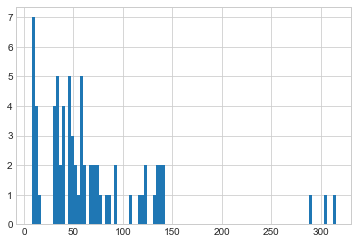

In [168]:
plt.hist(abilify_new['e_mean'], bins=100) # <-

In [173]:
abilify_long.to_excel('C:/Users/Drakkar/Desktop/abilify_long.xlsx')

,Product_number,Packing,Strength,Company,Indicator,e20150202,e20150216,e20150302,e20150316,e20150330,...,e20191118,e20191202,e20191216,e20191230,e20200113,e20200127,e20200210,e20200224,e20200309,e20200323
46555,10951,28 stk. (blister),10 mg,Otsuka Pharma,AUP_pr_DDD,71.583543,71.583543,44.428671,40.038571,35.865431,...,70.501420,70.501420,70.501420,70.501420,70.305887,70.305887,70.305887,70.305887,70.305887,70.305887
46567,11008,56 stk. (blister),10 mg,Otsuka Pharma,AUP_pr_DDD,71.254654,55.224600,39.781159,36.414164,32.571719,...,70.355985,70.355985,70.355985,70.355985,70.161787,70.161787,70.161787,70.161787,70.161787,70.161787
46591,27968,28 stk. (blister),10 mg,Otsuka Pharma,AUP_pr_DDD,85.782397,85.782397,85.782397,85.782397,85.782397,...,84.558311,84.558311,84.558311,84.558311,84.322601,84.322601,84.322601,84.322601,84.322601,84.322601
46603,28032,28 stk. (blister) (Orifarm),10 mg,Orifarm,AUP_pr_DDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46607,28041,56 stk. (blister) (Orifarm),10 mg,Orifarm,AUP_pr_DDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46619,41989,28 stk. (blister) (Abacus),10 mg,Abacus,AUP_pr_DDD,60.373922,55.659720,55.659720,55.659720,44.755451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46623,42000,56 stk. (blister) (Abacus),10 mg,Abacus,AUP_pr_DDD,59.973750,59.973750,59.973750,59.973750,59.973750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46635,43843,28 stk. (blister) (Pharmacodane),10 mg,PharmaCoDane,AUP_pr_DDD,64.335458,57.676649,57.676649,57.676649,57.676649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46639,43852,56 stk. (blister) (PharmaCoDane),10 mg,PharmaCoDane,AUP_pr_DDD,59.689819,54.346021,44.466022,44.466022,44.466022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46687,70509,28 stk. (blister) (2care4),10 mg,2care4,AUP_pr_DDD,56.248996,56.248996,56.248996,56.248996,56.248996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
